**<h3 align="center">Deep Learning - Project</h3>**
# **<h3 align="center">Neural Network</h3>**
**Group members:**<br>Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Ilona Nacu - 20211602@novaims.unl.pt - 20211602<br>
Francisco Farinha - 20211550@novaims.unl.pt - 20211550<br>
João Barradas - 20211590@novaims.unl.pt - 20211590<br>
Rafael Proença  - 2021681@novaims.unl.pt - 2021681<br>

# Table of Contents
* [1. Imports](#chapter1)
    * [1.1. Libraries](#section_1_1)
    * [1.2. Datasets](#section_1_2)
* [2. Neural Network Models](#chapter2)
    * [2.1. First Model](#section_2_1)
        * [2.1.1. Modeling](#sub_section_2_1_1)
        * [2.1.2. Check Performance](#sub_section_2_1_2)        
        * [2.1.3. Problems to Solve](#sub_section_2_1_3)
    * [2.2. Second Model](#section_2_2)
        * [2.2.1. Modeling](#sub_section_2_2_1)
        * [2.2.2. Check Performance](#sub_section_2_2_2)        
        * [2.2.3. Problems to Solve](#sub_section_2_2_3)
    * [2.3. Third Model](#section_2_3)
        * [2.3.1. Modeling](#sub_section_2_3_1)
        * [2.3.2. Check Performance](#sub_section_2_3_2)        
        * [2.3.3. Problems to Solve](#sub_section_2_3_3)
    * [2.4. Fourth Model](#section_2_4)
        * [2.4.1. Modeling](#sub_section_2_4_1)
        * [2.4.2. Check Performance](#sub_section_2_4_2)        
        * [2.4.3. Problems to Solve](#sub_section_2_4_3)
    * [2.5. Fifth Model](#section_2_5)
        * [2.5.1. Modeling](#sub_section_2_5_1)
        * [2.5.2. Check Performance](#sub_section_2_5_2)        
        * [2.5.3. Problems to Solve](#sub_section_2_5_3)
* [3. Model Comparison](#chapter3)
    * [3.1. Comparing results](#section_3_1)
* [4. Saving the Final Model](#chapter4)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.Imports <a class="anchor" id="chapter1"></a>

## 1.1. Libraries <a class="anchor" id="section_1_1"></a>

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Prepare data to CNN
from sklearn.utils.class_weight import compute_class_weight

#To build the NN
from tensorflow import keras
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, Callback, ModelCheckpoint
from keras.models import Model, Sequential, load_model
from keras.layers import Input, Dense, Dropout
from keras import regularizers
#import keras.backend as K
import keras_tuner as kt

#To evaluate the NN
import sys
sys.path.append('/content/drive/MyDrive/Deep Learning/Project - 80%')
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from utils import evaluate_classification_report_with_matrix, plot_loss, get_f1_score

## 1.2. Datasets <a class="anchor" id="section_1_2"></a>

Importing the datasets that we are going to need, previously preprocessed in notebook 1.

In [ ]:
# Reading the CSV files
X_train = pd.read_csv("/content/drive/MyDrive/Deep Learning/Project - 80%/Data/X_Data/X_train_metadata.csv")
X_val = pd.read_csv("/content/drive/MyDrive/Deep Learning/Project - 80%/Data/X_Data/X_val_metadata.csv")
X_test = pd.read_csv("/content/drive/MyDrive/Deep Learning/Project - 80%/Data/X_Data/X_test_metadata.csv")

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6384 entries, 0 to 6383
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   benign                        6384 non-null   int64
 1   age_coded                     6384 non-null   int64
 2   sex_male                      6384 non-null   int64
 3   localization_acral            6384 non-null   int64
 4   localization_back             6384 non-null   int64
 5   localization_chest            6384 non-null   int64
 6   localization_ear              6384 non-null   int64
 7   localization_face             6384 non-null   int64
 8   localization_foot             6384 non-null   int64
 9   localization_genital          6384 non-null   int64
 10  localization_hand             6384 non-null   int64
 11  localization_lower extremity  6384 non-null   int64
 12  localization_neck             6384 non-null   int64
 13  localization_scalp            638

In [ ]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   benign                        1127 non-null   int64
 1   age_coded                     1127 non-null   int64
 2   sex_male                      1127 non-null   int64
 3   localization_acral            1127 non-null   int64
 4   localization_back             1127 non-null   int64
 5   localization_chest            1127 non-null   int64
 6   localization_ear              1127 non-null   int64
 7   localization_face             1127 non-null   int64
 8   localization_foot             1127 non-null   int64
 9   localization_genital          1127 non-null   int64
 10  localization_hand             1127 non-null   int64
 11  localization_lower extremity  1127 non-null   int64
 12  localization_neck             1127 non-null   int64
 13  localization_scalp            112

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2504 entries, 0 to 2503
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   benign                        2504 non-null   int64
 1   age_coded                     2504 non-null   int64
 2   sex_male                      2504 non-null   int64
 3   localization_acral            2504 non-null   int64
 4   localization_back             2504 non-null   int64
 5   localization_chest            2504 non-null   int64
 6   localization_ear              2504 non-null   int64
 7   localization_face             2504 non-null   int64
 8   localization_foot             2504 non-null   int64
 9   localization_genital          2504 non-null   int64
 10  localization_hand             2504 non-null   int64
 11  localization_lower extremity  2504 non-null   int64
 12  localization_neck             2504 non-null   int64
 13  localization_scalp            250

In [ ]:
# Loading the rest of the variables - one hot encoded
y_train_categorical = np.load('/content/drive/MyDrive/Deep Learning/Project - 80%/Data/Y_Data/y_train_categorical.npy')
y_val_categorical = np.load('/content/drive/MyDrive/Deep Learning/Project - 80%/Data/Y_Data/y_val_categorical.npy')
y_test_categorical = np.load('/content/drive/MyDrive/Deep Learning/Project - 80%/Data/Y_Data/y_test_categorical.npy')

In [ ]:
print("Confirming the data has the correct shape")
print("X train:", X_train.shape)
print("X val:", X_val.shape)
print("X test:", X_test.shape, "\n")

print("Y train:", y_train_categorical.shape)
print("Y val:",y_val_categorical.shape)
print("Y test", y_test_categorical.shape)

Confirming the data has the correct shape
X train: (6384, 24)
X val: (1127, 24)
X test: (2504, 24) 

Y train: (6384, 7)
Y val: (1127, 7)
Y test (2504, 7)


# 2.Neural Network Models <a class="anchor" id="chapter2"></a>
----

Before proceeding with the creation of neural network models, it's important to specify our primary evaluation metric for overall model performance. Given the existing class imbalance in our target variable, we'll prioritize the weighted average f1 score. This metric incorporates class support information by considering the support of each class within the average of the f1 scores. <br>

In this section, we follow a step-by-step approach: model creation, performance assessment and model considerations. This approach ensures a well-organized and coherent notebook, facilitating a clear line of reasoning and analysis.<br>
In the performance assessment sections, we'll utilize several functions imported from the "utils.py" file.

## 2.1. First Model <a class="anchor" id="section_2_1"></a>

We'll begin by testing a basic model to understand our starting point and identify the highest benchmark achievable with the preprocessing steps we've implemented.

**Note:** We will be using the optimizer adam, instead of rmsprop, as the results with adam were generally better in every model we tested.

### 2.1.1 Modeling <a class="anchor" id="sub_section_2_1_1"></a>

In [ ]:
# Define input layer
input_shape_m = X_train.shape[1]  # Get the number of features

input_layer = Input(shape=(input_shape_m,))
# Hidden layers
dense1_m = Dense(128, activation="relu")(input_layer)
dense2_m = Dense(64, activation="relu")(dense1_m)
dense3_m = Dense(64, activation="relu")(dense2_m)
dense4_m = Dense(32, activation="relu")(dense3_m)

# Output layer
output_layer_m = Dense(7, activation="softmax")(dense4_m)

# Create the model
model1 = Model(inputs=input_layer, outputs=output_layer_m)
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1.save("/content/drive/MyDrive/Deep Learning/Project - 80%/Models/Attempts/model_metadata_1.keras")

In [ ]:
history1 = model1.fit(
    X_train, y_train_categorical,
    validation_data=(X_val, y_val_categorical),
    epochs=50,
    batch_size=100)

Epoch 1/50
64/64 [==============================] - 1s 6ms/step - loss: 1.0257 - accuracy: 0.6745 - val_loss: 0.6673 - val_accuracy: 0.7657
Epoch 2/50
64/64 [==============================] - 0s 3ms/step - loss: 0.5683 - accuracy: 0.7984 - val_loss: 0.4957 - val_accuracy: 0.8101
Epoch 3/50
64/64 [==============================] - 0s 3ms/step - loss: 0.4819 - accuracy: 0.8123 - val_loss: 0.4650 - val_accuracy: 0.8057
Epoch 4/50
64/64 [==============================] - 0s 3ms/step - loss: 0.4574 - accuracy: 0.8141 - val_loss: 0.4471 - val_accuracy: 0.8261
Epoch 5/50
64/64 [==============================] - 0s 3ms/step - loss: 0.4500 - accuracy: 0.8163 - val_loss: 0.4387 - val_accuracy: 0.8057
Epoch 6/50
64/64 [==============================] - 0s 3ms/step - loss: 0.4383 - accuracy: 0.8197 - val_loss: 0.4259 - val_accuracy: 0.8075
Epoch 7/50
64/64 [==============================] - 0s 3ms/step - loss: 0.4326 - accuracy: 0.8214 - val_loss: 0.4344 - val_accuracy: 0.8225
Epoch 8/50
64/64 [==

### 2.1.2.  Check performance <a class="anchor" id="sub_section_2_1_2"></a>

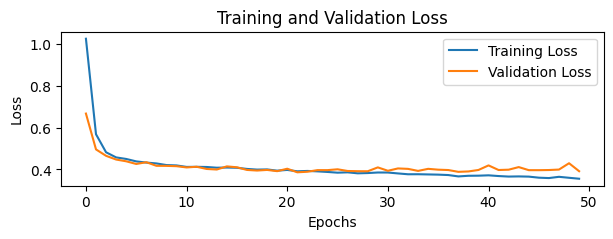

In [ ]:
plot_loss(history1)

In [ ]:
evaluate_classification_report_with_matrix(model1, X_train, y_train_categorical, matrix = False)

200/200 [==============================] - 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.24      0.34       208
           1       0.61      0.40      0.48       327
           2       0.72      0.65      0.68       700
           3       0.83      0.26      0.40        73
           4       0.67      0.89      0.76       710
           5       0.93      0.97      0.95      4275
           6       0.83      0.26      0.40        91

    accuracy                           0.85      6384
   macro avg       0.74      0.52      0.57      6384
weighted avg       0.85      0.85      0.84      6384



36/36 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.32      0.45        37
           1       0.54      0.33      0.41        58
           2       0.65      0.55      0.59       124
           3       1.00      0.38      0.56        13
           4       0.66      0.89      0.76       125
           5       0.92      0.97      0.94       754
           6       0.60      0.19      0.29        16

    accuracy                           0.84      1127
   macro avg       0.73      0.52      0.57      1127
weighted avg       0.83      0.84      0.83      1127



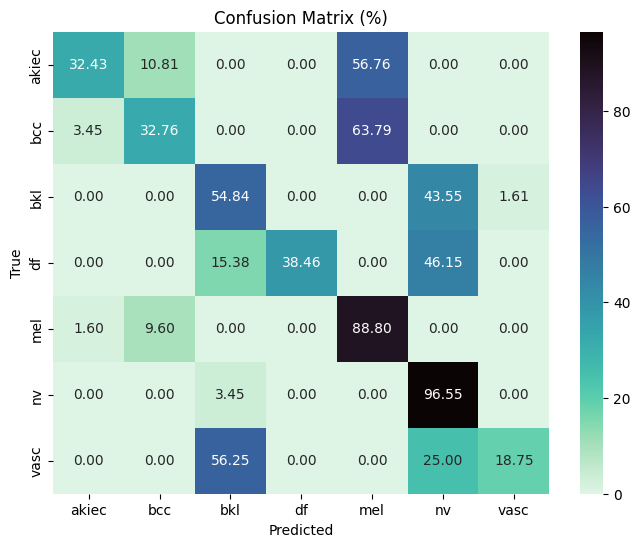

In [ ]:
evaluate_classification_report_with_matrix(model1, X_val, y_val_categorical)

79/79 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.17      0.24        82
           1       0.50      0.33      0.40       129
           2       0.70      0.57      0.63       275
           3       0.78      0.24      0.37        29
           4       0.64      0.84      0.72       278
           5       0.91      0.97      0.94      1676
           6       0.22      0.06      0.09        35

    accuracy                           0.83      2504
   macro avg       0.59      0.45      0.48      2504
weighted avg       0.81      0.83      0.81      2504



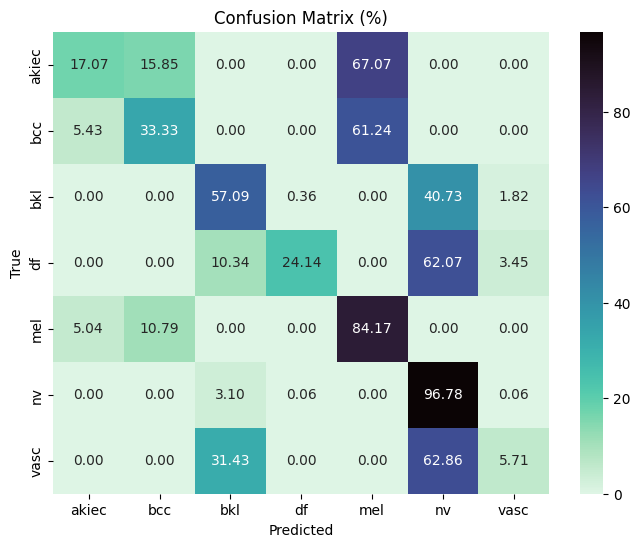

In [ ]:
evaluate_classification_report_with_matrix(model1, X_test, y_test_categorical)

### 2.1.3 Observations <a class="anchor" id="sub_section_2_1_3"></a>

>There seems to be no overfitting in our model, and for a first attempt, the results were not bad. We can consider this model has an overall good performance with 0.81 in weighted f1 score. <br>
Through the classification report we can see that, due to class imbalance, some classes are being poorly predicted like 'vasc'. So, for the next model, we will try **balanced class weights** from sklearn.


## 2.2. Second Model <a class="anchor" id="section_2_2"></a>


Computing class weights:
As we have unbalanced data, it may be beneficial if we tried to compute class weights. We'll first try with the "balanced" version, from sklearn.

In [ ]:
y_integers = np.argmax(y_train_categorical, axis=1)
class_weights = compute_class_weight('balanced', classes= np.unique(y_integers), y= y_integers)
d_class_weights = dict(enumerate(class_weights))

In [ ]:
d_class_weights

{0: 4.384615384615385,
 1: 2.7889908256880735,
 2: 1.302857142857143,
 3: 12.493150684931507,
 4: 1.2845070422535212,
 5: 0.21333333333333335,
 6: 10.021978021978022}

### 2.2.1 Modeling <a class="anchor" id="sub_section_2_2_1"></a>


In [ ]:
# Define input layer
input_shape_m = X_train.shape[1]  # Get the number of features

input_layer = Input(shape=(input_shape_m,))
# Hidden layers
dense1_m = Dense(128, activation="relu")(input_layer)
dense2_m = Dense(64, activation="relu")(dense1_m)
dense3_m = Dense(64, activation="relu")(dense2_m)
dense4_m = Dense(32, activation="relu")(dense3_m)

# Output layer
output_layer_m = Dense(7, activation="softmax")(dense4_m)

# Create the model
model2 = Model(inputs=input_layer, outputs=output_layer_m)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.save("/content/drive/MyDrive/Deep Learning/Project - 80%/Models/Attempts/model_metadata_2.keras")

In [ ]:
history2 = model2.fit(
    X_train, y_train_categorical,
    validation_data=(X_val, y_val_categorical),
    epochs=50,
    batch_size=100,
    class_weight=d_class_weights)

Epoch 1/50
64/64 [==============================] - 2s 8ms/step - loss: 1.9111 - accuracy: 0.2685 - val_loss: 1.6048 - val_accuracy: 0.4783
Epoch 2/50
64/64 [==============================] - 0s 4ms/step - loss: 1.3798 - accuracy: 0.5915 - val_loss: 0.9811 - val_accuracy: 0.5883
Epoch 3/50
64/64 [==============================] - 0s 4ms/step - loss: 1.0766 - accuracy: 0.6366 - val_loss: 0.9204 - val_accuracy: 0.5741
Epoch 4/50
64/64 [==============================] - 0s 4ms/step - loss: 1.0087 - accuracy: 0.6305 - val_loss: 0.7934 - val_accuracy: 0.6353
Epoch 5/50
64/64 [==============================] - 0s 4ms/step - loss: 0.9708 - accuracy: 0.6454 - val_loss: 0.7958 - val_accuracy: 0.6469
Epoch 6/50
64/64 [==============================] - 0s 5ms/step - loss: 0.9536 - accuracy: 0.6599 - val_loss: 0.7842 - val_accuracy: 0.6442
Epoch 7/50
64/64 [==============================] - 0s 4ms/step - loss: 0.9260 - accuracy: 0.6485 - val_loss: 0.7491 - val_accuracy: 0.6664
Epoch 8/50
64/64 [==

### 2.2.2.  Check performance <a class="anchor" id="sub_section_2_2_2"></a>

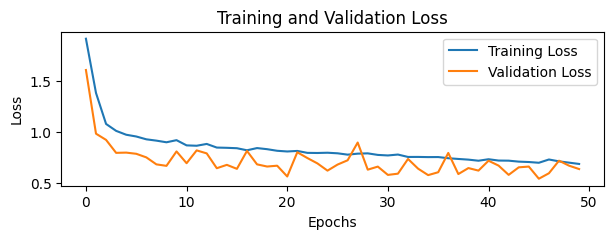

In [ ]:
plot_loss(history2)

In [ ]:
evaluate_classification_report_with_matrix(model2, X_train, y_train_categorical, matrix = False)

200/200 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.78      0.47       208
           1       0.44      0.54      0.49       327
           2       0.48      0.79      0.60       700
           3       0.23      0.81      0.35        73
           4       0.84      0.41      0.56       710
           5       0.99      0.77      0.87      4275
           6       0.17      0.78      0.28        91

    accuracy                           0.72      6384
   macro avg       0.50      0.70      0.52      6384
weighted avg       0.85      0.72      0.76      6384



36/36 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.76      0.45        37
           1       0.44      0.47      0.45        58
           2       0.48      0.80      0.60       124
           3       0.24      0.85      0.38        13
           4       0.80      0.45      0.57       125
           5       0.99      0.78      0.87       754
           6       0.17      0.69      0.27        16

    accuracy                           0.72      1127
   macro avg       0.49      0.68      0.51      1127
weighted avg       0.84      0.72      0.76      1127



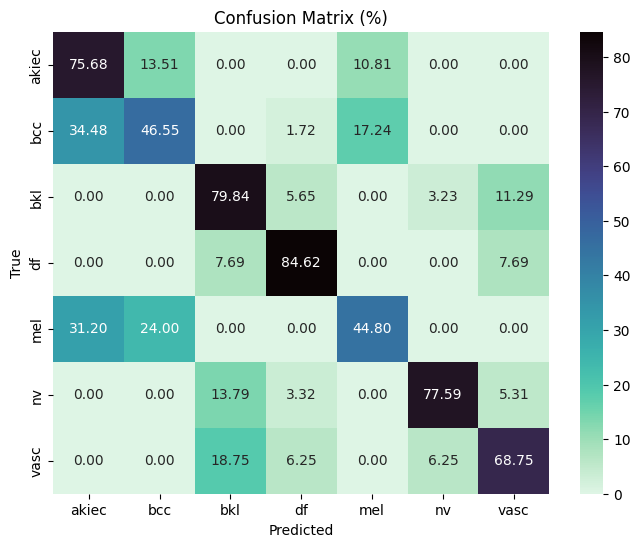

In [ ]:
evaluate_classification_report_with_matrix(model2, X_val, y_val_categorical)

79/79 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.79      0.47        82
           1       0.40      0.52      0.45       129
           2       0.45      0.72      0.56       275
           3       0.17      0.69      0.27        29
           4       0.83      0.37      0.52       278
           5       0.99      0.76      0.86      1676
           6       0.13      0.60      0.21        35

    accuracy                           0.70      2504
   macro avg       0.47      0.64      0.48      2504
weighted avg       0.84      0.70      0.74      2504



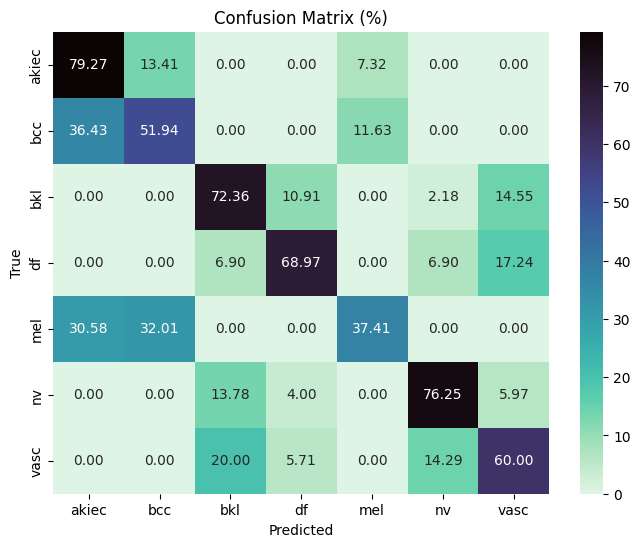

In [ ]:
evaluate_classification_report_with_matrix(model2, X_test, y_test_categorical)

### 2.2.3. Observations <a class="anchor" id="sub_section_2_2_3"></a>

>The classes that were being poorly predicted in the previous model had a significant f1 score improvement, but the weighted avg f1 score decreased in a considerable way. A solution for this would be to use **manually define class weights** since there are some classes that still do not have enough weight, and this way we can manually pick the best weights in order to improve the model, as done in Notebook 2.

## 2.3. Third Model <a class="anchor" id="section_2_3"></a>

Using balanced weights we did not achieve the best model results (in terms of weighted avg f1 score), so after some tries, we adapted the weights to reach better results. <br>
The basis for the weight values were the ones from the balanced weights, we adjusted those as needed, until we obtained the values bellow, by looking at the classification report for the train set and seeing which classes needed to be compensated.

In [ ]:
manual_weights = {
    0: 6.0,
    1: 5.0,
    2: 2.0,
    3: 12.0,
    4: 3.0,
    5: 1.0,
    6: 10.0
}

# Apply the manual weights
y_integers = np.argmax(y_train_categorical, axis=1)
class_weights = [manual_weights[i] for i in np.unique(y_integers)]
class_weights_dict = dict(enumerate(class_weights))

### 2.3.1 Modeling <a class="anchor" id="sub_section_2_3_1"></a>


In [ ]:
# Define input layer
input_shape_m = X_train.shape[1]  # Get the number of features

input_layer = Input(shape=(input_shape_m,))
# Hidden layers
dense1_m = Dense(128, activation="relu")(input_layer)
dense2_m = Dense(64, activation="relu")(dense1_m)
dense3_m = Dense(64, activation="relu")(dense2_m)
dense4_m = Dense(32, activation="relu")(dense3_m)

# Output layer
output_layer_m = Dense(7, activation="softmax")(dense4_m)

# Create the model
model3 = Model(inputs=input_layer, outputs=output_layer_m)
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3.save("/content/drive/MyDrive/Deep Learning/Project - 80%/Models/Attempts/model_metadata_3.keras")

In [ ]:
history3 = model3.fit(
    X_train, y_train_categorical,
    validation_data=(X_val, y_val_categorical),
    epochs=50,
    batch_size=100,
    class_weight=class_weights_dict)

Epoch 1/50
64/64 [==============================] - 2s 9ms/step - loss: 3.0484 - accuracy: 0.7253 - val_loss: 0.7207 - val_accuracy: 0.7613
Epoch 2/50
64/64 [==============================] - 0s 4ms/step - loss: 2.0119 - accuracy: 0.7815 - val_loss: 0.6168 - val_accuracy: 0.7817
Epoch 3/50
64/64 [==============================] - 0s 4ms/step - loss: 1.7703 - accuracy: 0.7794 - val_loss: 0.5241 - val_accuracy: 0.8066
Epoch 4/50
64/64 [==============================] - 0s 5ms/step - loss: 1.6772 - accuracy: 0.7796 - val_loss: 0.5634 - val_accuracy: 0.7666
Epoch 5/50
64/64 [==============================] - 0s 5ms/step - loss: 1.5976 - accuracy: 0.7824 - val_loss: 0.5275 - val_accuracy: 0.8012
Epoch 6/50
64/64 [==============================] - 0s 5ms/step - loss: 1.5850 - accuracy: 0.7785 - val_loss: 0.5938 - val_accuracy: 0.7613
Epoch 7/50
64/64 [==============================] - 0s 5ms/step - loss: 1.5600 - accuracy: 0.7779 - val_loss: 0.5960 - val_accuracy: 0.7507
Epoch 8/50
64/64 [==

### 2.3.2. Check performance <a class="anchor" id="sub_section_2_3_2"></a>


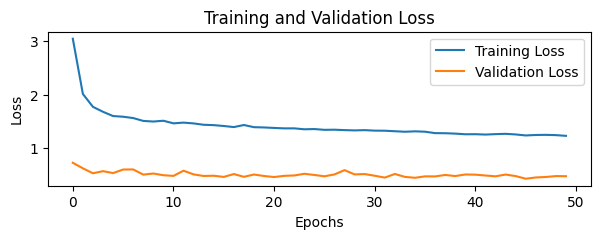

In [ ]:
plot_loss(history3)

In [ ]:
evaluate_classification_report_with_matrix(model3, X_train, y_train_categorical, matrix = False)

200/200 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.54      0.47       208
           1       0.50      0.51      0.51       327
           2       0.58      0.73      0.64       700
           3       0.42      0.62      0.50        73
           4       0.74      0.67      0.71       710
           5       0.97      0.88      0.92      4275
           6       0.27      0.74      0.39        91

    accuracy                           0.81      6384
   macro avg       0.56      0.67      0.59      6384
weighted avg       0.84      0.81      0.82      6384



36/36 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.62      0.49        37
           1       0.45      0.45      0.45        58
           2       0.59      0.70      0.64       124
           3       0.35      0.54      0.42        13
           4       0.71      0.60      0.65       125
           5       0.96      0.89      0.92       754
           6       0.27      0.75      0.40        16

    accuracy                           0.80      1127
   macro avg       0.54      0.65      0.57      1127
weighted avg       0.83      0.80      0.81      1127



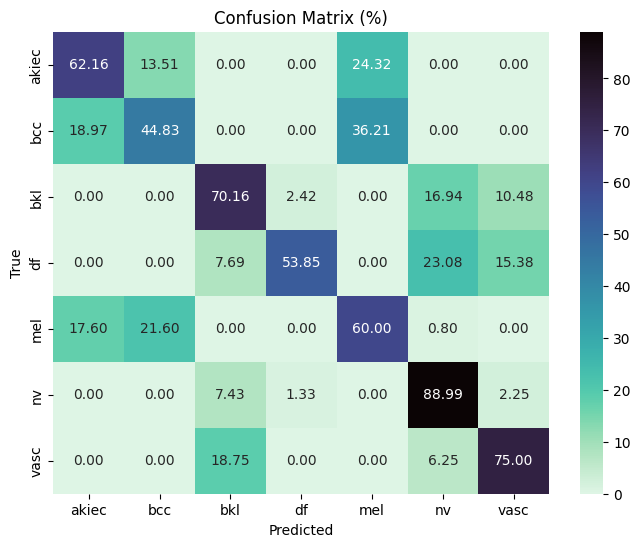

In [ ]:
evaluate_classification_report_with_matrix(model3, X_val, y_val_categorical)

79/79 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.52      0.43        82
           1       0.48      0.50      0.49       129
           2       0.53      0.69      0.60       275
           3       0.29      0.41      0.34        29
           4       0.76      0.66      0.71       278
           5       0.96      0.87      0.91      1676
           6       0.15      0.46      0.23        35

    accuracy                           0.78      2504
   macro avg       0.51      0.59      0.53      2504
weighted avg       0.83      0.78      0.80      2504



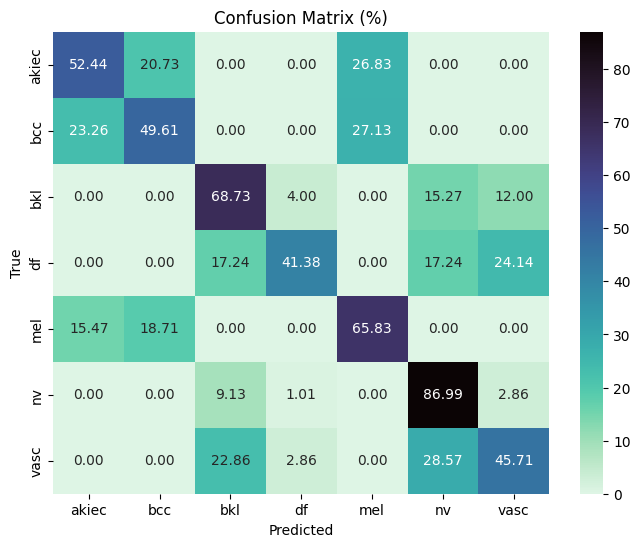

In [ ]:
evaluate_classification_report_with_matrix(model3, X_test, y_test_categorical)

### 2.3.3. Observations <a class="anchor" id="sub_section_2_3_3"></a>

>The weighted average f1 score improved when compared with the previous model. By adjusting the weights, we could also obtain better predictions in all classes. One important note is that this model has a worse weighted f1 score than the first one, but this one is much more balanced when we look at the capability of generating decent predictions for all classes. So we consider that this third model is better than the first one overall. <br>
In the next model, we are going to define an architechture with more layers in an attempt to improve even more this third model.

## 2.4. Fourth Model <a class="anchor" id="section_2_4"></a>

Trying a model with more layers.

### 2.4.1. Modeling <a class="anchor" id="sub_section_2_4_1"></a>


In [ ]:
# Define input layer
input_shape_m = X_train.shape[1]  # Get the number of features

input_layer = Input(shape=(input_shape_m,))
# Hidden layers
dense1_m = Dense(300, activation="relu")(input_layer)
dense2_m = Dense(100, activation="relu")(dense1_m)
dense3_m = Dense(80, activation="relu")(dense2_m)
dense4_m = Dense(64, activation="relu")(dense3_m)
dense5_m = Dense(32, activation="relu")(dense4_m)
dense6_m = Dense(32, activation="relu")(dense5_m)
dense7_m = Dense(40, activation="relu")(dense6_m)
dense8_m = Dense(20, activation="relu")(dense7_m)


# Output layer
output_layer_m = Dense(7, activation="softmax")(dense8_m)

# Create the model
model4 = Model(inputs=input_layer, outputs=output_layer_m)
model4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model4.save("/content/drive/MyDrive/Deep Learning/Project - 80%/Models/Attempts/model_metadata_4.keras")

In [ ]:
history4 = model4.fit(
    X_train, y_train_categorical,
    validation_data=(X_val, y_val_categorical),
    epochs=50,
    batch_size=100,
    class_weight=class_weights_dict)

Epoch 1/50
64/64 [==============================] - 1s 7ms/step - loss: 3.0389 - accuracy: 0.6873 - val_loss: 0.7851 - val_accuracy: 0.7480
Epoch 2/50
64/64 [==============================] - 0s 4ms/step - loss: 2.2845 - accuracy: 0.7406 - val_loss: 0.6454 - val_accuracy: 0.7959
Epoch 3/50
64/64 [==============================] - 0s 4ms/step - loss: 1.9993 - accuracy: 0.7545 - val_loss: 0.5170 - val_accuracy: 0.8083
Epoch 4/50
64/64 [==============================] - 0s 4ms/step - loss: 1.9612 - accuracy: 0.7567 - val_loss: 0.6339 - val_accuracy: 0.7489
Epoch 5/50
64/64 [==============================] - 0s 4ms/step - loss: 1.8688 - accuracy: 0.7639 - val_loss: 0.5605 - val_accuracy: 0.7622
Epoch 6/50
64/64 [==============================] - 0s 4ms/step - loss: 1.8488 - accuracy: 0.7680 - val_loss: 0.6600 - val_accuracy: 0.7808
Epoch 7/50
64/64 [==============================] - 0s 4ms/step - loss: 1.8209 - accuracy: 0.7575 - val_loss: 0.5811 - val_accuracy: 0.7595
Epoch 8/50
64/64 [==

### 2.4.2. Check performance <a class="anchor" id="sub_section_2_4_2"></a>


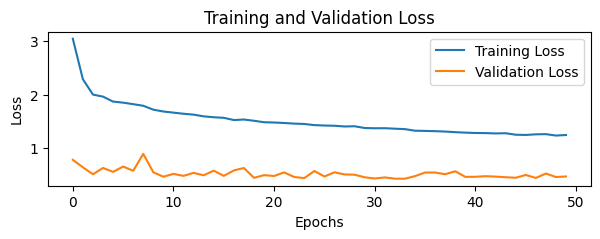

In [ ]:
plot_loss(history4)

In [ ]:
evaluate_classification_report_with_matrix(model4, X_train, y_train_categorical, matrix = False)

200/200 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.34      0.37       208
           1       0.47      0.60      0.53       327
           2       0.62      0.71      0.66       700
           3       0.30      0.85      0.44        73
           4       0.73      0.67      0.70       710
           5       0.97      0.88      0.92      4275
           6       0.29      0.74      0.42        91

    accuracy                           0.81      6384
   macro avg       0.54      0.68      0.58      6384
weighted avg       0.84      0.81      0.82      6384



36/36 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.22      0.27        37
           1       0.42      0.53      0.47        58
           2       0.63      0.65      0.64       124
           3       0.30      0.85      0.44        13
           4       0.67      0.66      0.66       125
           5       0.96      0.89      0.92       754
           6       0.22      0.62      0.33        16

    accuracy                           0.79      1127
   macro avg       0.51      0.63      0.53      1127
weighted avg       0.82      0.79      0.80      1127



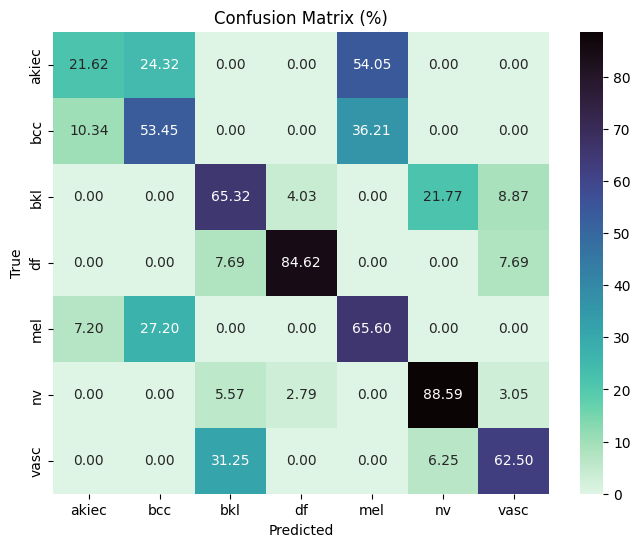

In [ ]:
evaluate_classification_report_with_matrix(model4, X_val, y_val_categorical)

79/79 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.30      0.33        82
           1       0.40      0.48      0.44       129
           2       0.60      0.65      0.63       275
           3       0.20      0.72      0.31        29
           4       0.66      0.62      0.64       278
           5       0.96      0.87      0.91      1676
           6       0.11      0.31      0.16        35

    accuracy                           0.77      2504
   macro avg       0.47      0.57      0.49      2504
weighted avg       0.82      0.77      0.79      2504



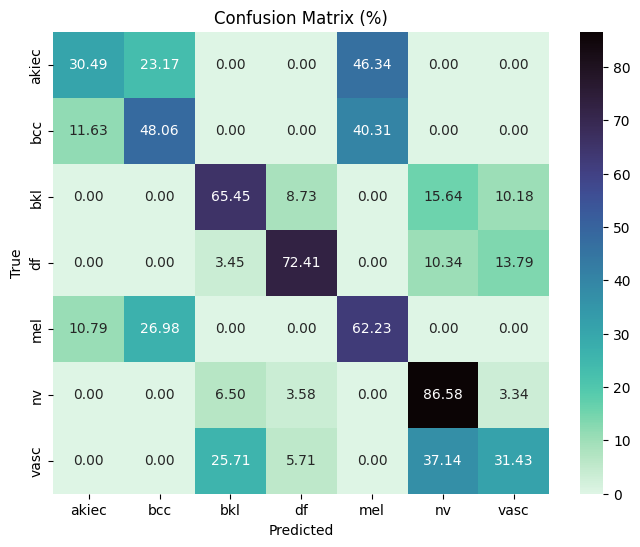

In [ ]:
evaluate_classification_report_with_matrix(model4, X_test, y_test_categorical)

### 2.4.3. Observations <a class="anchor" id="sub_section_2_4_3"></a>
>Adding more layers did not improve the weighted f1 score it resulted in a decrease. So in the next section, while improving model performance with Keras Tuner, we'll be using a similar architecture to the third model from 3.3.1.

## 2.5. Improving performance with Keras Tuner - Fifth Model <a class="anchor" id="section_2_5"></a>

Keras Tuner is used for hyperparameter optimization, helping find the best architecture for neural networks. In the below process, a hyperparameter search space is defined for the model architecture, seeking the best combination of layer units, activation functions, and learning rates to minimize validation loss. This process aims to fine-tune these parameters, improving the model's performance.

### 2.5.1. Keras Tuner <a class="anchor" id="sub_section_2_5_1"></a>

From Practical Class 10 (week 6)

In [ ]:
def model_builder(hp):
  '''
  Arguments:

  '''

  input_shape_m = X_train.shape[1]  # Get the number of features
  input_layer = Input(shape=(input_shape_m,))
  # Hidden layers
  hp_units = hp.Int('units', min_value=32, max_value=512, step=12)
  dense1_m = Dense(units = hp_units, activation=hp.Choice("activation", ["relu", "tanh"]))(input_layer)

  hp_units2= hp.Int("units2", min_value= 32, max_value=256, step=12)
  dense2_m = Dense(units = hp_units2, activation=hp.Choice("activation", ["relu", "tanh"]))(dense1_m)

  hp_units3= hp.Int("units3", min_value= 5, max_value=128, step=12)
  dense3_m = Dense(units = hp_units3, activation=hp.Choice("activation", ["relu", "tanh"]))(dense2_m)

  hp_units4= hp.Int("units4", min_value= 5, max_value=128, step=12)
  dense4_m = Dense(units=hp_units4, activation=hp.Choice("activation", ["relu", "tanh"]))(dense3_m)

  hp_units5= hp.Int("units5", min_value= 5, max_value=64, step=12)
  dense5_m = Dense(units=hp_units5, activation=hp.Choice("activation", ["relu", "tanh"]))(dense4_m)

  # Output layer
  output_layer_m = Dense(7, activation="softmax")(dense5_m)

  # Create the model
  model = Model(inputs=input_layer, outputs=output_layer_m)

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
                loss=["categorical_crossentropy"],
                metrics=['accuracy']
                )

  return model

In [ ]:
# Instantiate the tuner
tuner = kt.Hyperband(model_builder,
                     kt.Objective("val_loss", direction="min"),
                     max_epochs=50,
                     factor=3,      # Reduction factor for the number of epochs and number of models for each bracket, default is 3
                     directory='/content/drive/MyDrive/Deep Learning/Project - 80%/Models/KerasTuner',
                     project_name='hyper:(')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 12, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 12, 'sampling': 'linear'}
units3 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 128, 'step': 12, 'sampling': 'linear'}
units4 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 128, 'step': 12, 'sampling': 'linear'}
units5 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 64, 'step': 12, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(X_train, y_train_categorical, epochs=30, validation_data=(X_val, y_val_categorical), class_weight=class_weights_dict)


Trial 90 Complete [00h 00m 43s]
val_loss: 0.4325426518917084

Best val_loss So Far: 0.42499133944511414
Total elapsed time: 00h 16m 28s


In [ ]:
best_hp=tuner.get_best_hyperparameters()[0]
print(best_hp.values)

{'units': 32, 'activation': 'tanh', 'units2': 140, 'units3': 125, 'units4': 17, 'units5': 29, 'learning_rate': 0.001, 'tuner/epochs': 50, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


### 2.5.2. Best Model from Keras Tuner <a class="anchor" id="sub_section_2_5_2"></a>

In [ ]:
# Define input layer
input_shape_m = X_train.shape[1]  # Get the number of features

input_layer = Input(shape=(input_shape_m,))
# Hidden layers
dense5_m = Dense(32, activation="tanh")(input_layer)
dense6_m = Dense(140, activation="tanh")(dense5_m)
dense7_m = Dense(125, activation="tanh")(dense6_m)
dense8_m = Dense(17, activation="tanh")(dense7_m)
dense9_m = Dense(29, activation="tanh")(dense8_m)


# Output layer
output_layer_m = Dense(7, activation="softmax")(dense9_m)

# Create the model
model5 = Model(inputs=input_layer, outputs=output_layer_m)
model5.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model5.save("/content/drive/MyDrive/Deep Learning/Project - 80%/Models/Attempts/model_metadata_5.keras")

model5.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense_6 (Dense)             (None, 32)                800       
                                                                 
 dense_7 (Dense)             (None, 140)               4620      
                                                                 
 dense_8 (Dense)             (None, 125)               17625     
                                                                 
 dense_9 (Dense)             (None, 17)                2142      
                                                                 
 dense_10 (Dense)            (None, 29)                522       
                                                                 
 dense_11 (Dense)            (None, 7)                 210 

In [ ]:
# Train the model with class weights
history5 = model5.fit(
    X_train, y_train_categorical,
    validation_data=(X_val, y_val_categorical),
    epochs=30,
    batch_size=100 ,  class_weight=class_weights_dict
)

Epoch 1/30
64/64 [==============================] - 1s 6ms/step - loss: 3.0107 - accuracy: 0.6925 - val_loss: 0.9077 - val_accuracy: 0.7507
Epoch 2/30
64/64 [==============================] - 0s 3ms/step - loss: 2.1063 - accuracy: 0.7694 - val_loss: 0.6138 - val_accuracy: 0.8066
Epoch 3/30
64/64 [==============================] - 0s 3ms/step - loss: 1.8383 - accuracy: 0.7763 - val_loss: 0.5957 - val_accuracy: 0.7791
Epoch 4/30
64/64 [==============================] - 0s 3ms/step - loss: 1.7457 - accuracy: 0.7768 - val_loss: 0.5986 - val_accuracy: 0.7471
Epoch 5/30
64/64 [==============================] - 0s 3ms/step - loss: 1.6932 - accuracy: 0.7762 - val_loss: 0.5152 - val_accuracy: 0.8075
Epoch 6/30
64/64 [==============================] - 0s 3ms/step - loss: 1.6462 - accuracy: 0.7679 - val_loss: 0.5924 - val_accuracy: 0.7835
Epoch 7/30
64/64 [==============================] - 0s 3ms/step - loss: 1.6052 - accuracy: 0.7733 - val_loss: 0.5224 - val_accuracy: 0.7950
Epoch 8/30
64/64 [==

### 2.5.3. Check performance <a class="anchor" id="sub_section_2_5_3"></a>

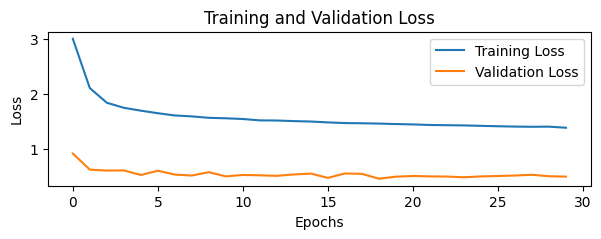

In [ ]:
plot_loss(history5)

In [ ]:
evaluate_classification_report_with_matrix(model5, X_train, y_train_categorical, matrix = False)

200/200 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.15      0.24       208
           1       0.48      0.59      0.53       327
           2       0.51      0.81      0.63       700
           3       0.36      0.60      0.45        73
           4       0.69      0.76      0.72       710
           5       0.97      0.86      0.91      4275
           6       0.37      0.36      0.36        91

    accuracy                           0.80      6384
   macro avg       0.56      0.59      0.55      6384
weighted avg       0.83      0.80      0.81      6384



36/36 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.16      0.26        37
           1       0.46      0.53      0.50        58
           2       0.49      0.75      0.60       124
           3       0.41      0.69      0.51        13
           4       0.69      0.78      0.73       125
           5       0.96      0.86      0.91       754
           6       0.24      0.31      0.27        16

    accuracy                           0.79      1127
   macro avg       0.55      0.59      0.54      1127
weighted avg       0.83      0.79      0.80      1127



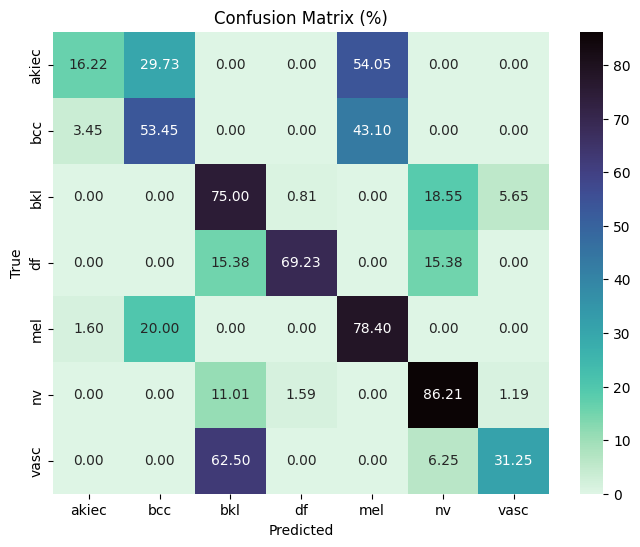

In [ ]:
evaluate_classification_report_with_matrix(model5, X_val, y_val_categorical)

79/79 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.18      0.28        82
           1       0.43      0.52      0.47       129
           2       0.51      0.81      0.63       275
           3       0.38      0.52      0.44        29
           4       0.64      0.71      0.68       278
           5       0.96      0.87      0.91      1676
           6       0.19      0.20      0.20        35

    accuracy                           0.79      2504
   macro avg       0.53      0.54      0.51      2504
weighted avg       0.82      0.79      0.80      2504



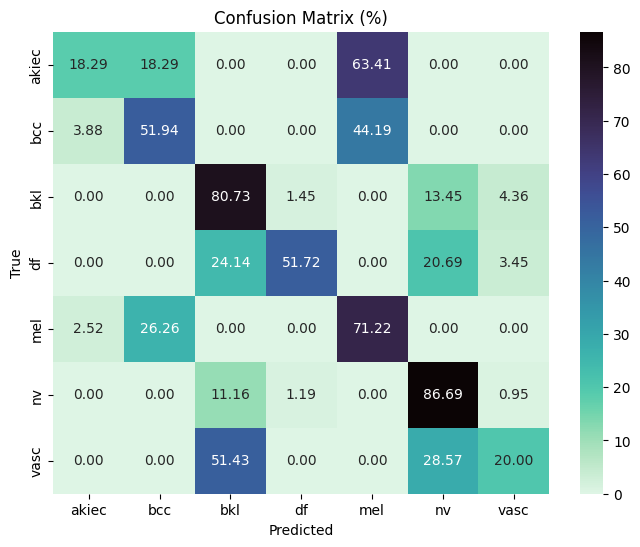

In [ ]:
evaluate_classification_report_with_matrix(model5, X_test, y_test_categorical)

### 2.5.4. Observations <a class="anchor" id="sub_section_2_5_4"></a>
>The results aren't bad, it has a good weighted f1 score but didn't the third model that so far we consider the best one. When comparing the third model with this one, the third predicts better every class with the exception of class 'df'. Nevertheless, it was an interesting experiment and something that could be useful to explore in future work.

# 3.Model Comparison <a class="anchor" id="chapter3"></a>
------------------------------------

In section 3, we're using the function 'get_f1_model' in the "utils.py" file to get the weighted f1 scores from each model we made. This will helps us compare how well they perform and decide which model is the most suitable for our problem. We'll choose this model to concatenate it with the best CNN model from notebook 2 in notebook 4.

In [ ]:
f1_train_1, f1_val_1, f1_test_1 = get_f1_model(model1, X_train, X_val, X_test, y_train_categorical, y_val_categorical, y_test_categorical)
f1_train_2, f1_val_2, f1_test_2 = get_f1_model(model2, X_train, X_val, X_test, y_train_categorical, y_val_categorical, y_test_categorical)
f1_train_3, f1_val_3, f1_test_3 = get_f1_model(model3, X_train, X_val, X_test, y_train_categorical, y_val_categorical, y_test_categorical)
f1_train_4, f1_val_4, f1_test_4 = get_f1_model(model4, X_train, X_val, X_test, y_train_categorical, y_val_categorical, y_test_categorical)
f1_train_5, f1_val_5, f1_test_5 = get_f1_model(model5, X_train, X_val, X_test, y_train_categorical, y_val_categorical, y_test_categorical)


f1_scores = pd.DataFrame({
    'Model Name': ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'],
    'Train F1 Score': [f1_train_1, f1_train_2, f1_train_3, f1_train_4, f1_train_5],
    'Validation F1 Score': [f1_val_1, f1_val_2, f1_val_3, f1_val_4, f1_val_5],
    'Test F1 Score': [f1_test_1, f1_test_2, f1_test_3, f1_test_4, f1_test_5]
})

79/79 [==============================] - 0s 2ms/step


## 3.1 Comparing results <a class="anchor" id="section_3_1"></a>


In [ ]:
f1_scores

,Model Name,Train F1 Score,Validation F1 Score,Test F1 Score
0,Model 1,0.840422,0.825540,0.813023
1,Model 2,0.758039,0.758108,0.739763
2,Model 3,0.820088,0.811636,0.802567
3,Model 4,0.818553,0.802889,0.788608
4,Model 5,0.805437,0.798598,0.796389


Model 1 demonstrates strong performance in predicting the test set but exhibits noticeable overfitting, which is undesirable. Additionally, it notably struggles in predicting a specific class, leading us to discard it from further analysis. <br>
Model 2 displays comparatively weaker performance across various sets when evaluated against the other models. <br>
Analyzing models 3, 4, and 5, the standout performers are models 3 and 5, showing superior performance in the test set compared to model 4. <br>
Between models 3 and 5, we previously analyzed that model 3 presented better f1 scores for all classes except for one class. With that, we conclude that the best model is Model 3.


# 4.Saving the Final Model <a class="anchor" id="chapter4"></a>



In this final section, we're saving what we consider the best model, Model 3. We plan to merge it with the best CNN model in notebook 4. Additionally, we're preserving the f1 scores of Model 3 for comparing results in notebook 4.

In [ ]:
model3.save("/content/drive/MyDrive/Deep Learning/Project - 80%/Models/Attempts/metadata_model_:(.keras")

In [ ]:
# Create a dataframe for F1 scores in Notebook 3, so that we can compare these results in notebook 4, with the final model
f1_scores_notebook_3 = pd.DataFrame({
    'Model Name': ['Tabular Data Model'],
    'Train F1 Score': [f1_train_3],
    'Validation F1 Score': [f1_val_3],
    'Test F1 Score': [f1_test_3]
})

# Save F1 scores to a CSV file
f1_scores_notebook_3.to_csv('/content/drive/MyDrive/Deep Learning/Project - 80%/f1_scores_notebook_3:(.csv', index=False)